In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
loc = r"C:/Users/Steven Wang/Desktop/Project1"

In [17]:
file_names = ['calendar', 'listings', 'reviews']
city_names = ['Boston_Data', 'Seattle_Data']

Boston_dic = {}
Seattle_dic = {}
for file in file_names:
    Boston_dic[file] = pd.read_csv(loc + "/Boston_Data/" + file + ".csv")
    Seattle_dic[file] = pd.read_csv(loc + "/Seattle_Data/" + file + ".csv")
        

In [18]:
Boston_dic['calendar'].head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [19]:
Boston_dic['listings'].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [36]:
Boston_dic['reviews'].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Question1: How are the reviews distributed? My experience with Airbnb implies that most reviews will be positive. 

In [22]:
Boston_listing = Boston_dic['listings']
Proportion = Boston_listing['review_scores_value'].isnull().sum()/len(Boston_listing['review_scores_value'])

In [24]:
print(Proportion) # ok to drop those values to get a sense of the reviews distribution; 

0.2290097629009763


<Axes: >

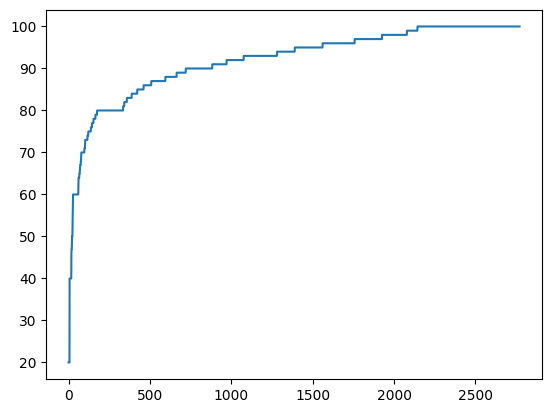

In [26]:
Boston_listing['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

As expected the majority reviewers give positive reviews. What about Seattle? 

In [27]:
Seattle_listing = Seattle_dic['listings']
Proportion = Seattle_listing['review_scores_value'].isnull().sum()/len(Seattle_listing['review_scores_value'])

In [28]:
print(Proportion)

0.17181770560502882


<Axes: >

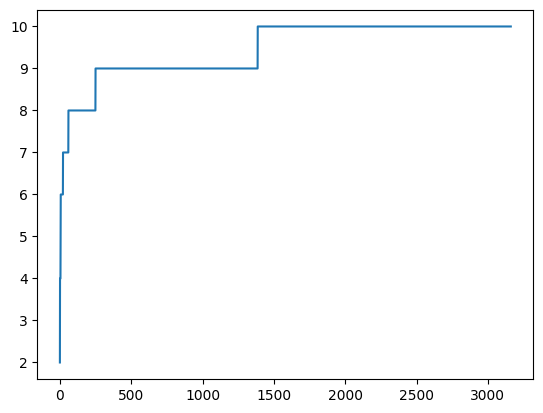

In [34]:
Seattle_listing['review_scores_value'].sort_values().reset_index(drop=True).dropna().plot()

Same as Boston, most reviews are positive. 

In [42]:
cols = Boston_listing.select_dtypes("object").columns

In [45]:
cols

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_rev

In [173]:
def IndVar_ana(df, var):
    mean = df.groupby(var)[['review_scores_rating']].mean()
    mean = mean.reset_index(drop = False)
    counts = df.groupby(var)[['id']].count()
    rows = counts[counts['id']>50].index
    rows_l = list(rows)
    df_to_plot = mean[mean[var].isin(rows_l)]
    plt.scatter(df_to_plot[var], df_to_plot['review_scores_rating'],  marker='o')
    plt.xticks(rotation = 90)
    return df_to_plot
    

What catogeorical variables would affect the reviews? Analyze cancellation policy and zipcode. 


In [128]:
BL = Boston_listing[Boston_listing['review_scores_rating'].notna()]

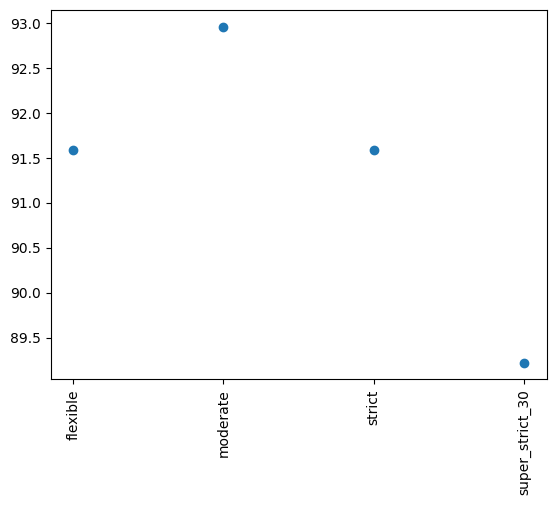

In [192]:
DD = IndVar_ana(BL, 'cancellation_policy')

Cancellation Policy seems to affect reviews. 

In [182]:
BL['zipcode']

1       02131
2       02131
3         NaN
4       02131
5       02131
        ...  
3574    02467
3575    02143
3578    02138
3580    02143
3583    02145
Name: zipcode, Length: 2772, dtype: object

In [188]:
zipcdoe_l90 =DD[DD['review_scores_rating']<90]['zipcode']
l =list(zipcdoe_l90)
BL['zipcode_l90'] = BL['zipcode'].apply(lambda x: 1 if x in l else 0)

C:\Users\Steven Wang\AppData\Local\Temp\ipykernel_79152\4071241347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BL['zipcode_l90'] = BL['zipcode'].apply(lambda x: 1 if x in l else 0)


In [191]:
l

['02120', '02124', '02125', '02215']

In [203]:
cols = BL.select_dtypes(float).columns

In [204]:
cols

Index(['neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'price', 'has_availability',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

In [159]:
BL['price'] = BL['price'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\Steven Wang\AppData\Local\Temp\ipykernel_79152\351536682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BL['price'] = BL['price'].replace('[\$,]', '', regex=True).astype(float)


Zipcode does not seem to be highly related with reviews.

In [208]:
BL_numericvar = BL[cols]

In [214]:
BL_numericvar.isnull().sum()/BL_numericvar.shape[0]


neighbourhood_group_cleansed    1.000000
latitude                        0.000000
longitude                       0.000000
bathrooms                       0.004329
bedrooms                        0.002525
beds                            0.002165
square_feet                     0.980880
price                           0.000000
has_availability                1.000000
review_scores_rating            0.000000
review_scores_accuracy          0.003968
review_scores_cleanliness       0.002165
review_scores_checkin           0.002886
review_scores_communication     0.002165
review_scores_location          0.003608
review_scores_value             0.003247
license                         1.000000
jurisdiction_names              1.000000
reviews_per_month               0.000000
dtype: float64

In [215]:
BL_num = BL_numericvar.drop(columns = 
                            ['neighbourhood_group_cleansed','neighbourhood_group_cleansed','has_availability','license','jurisdiction_names'])

<Axes: >

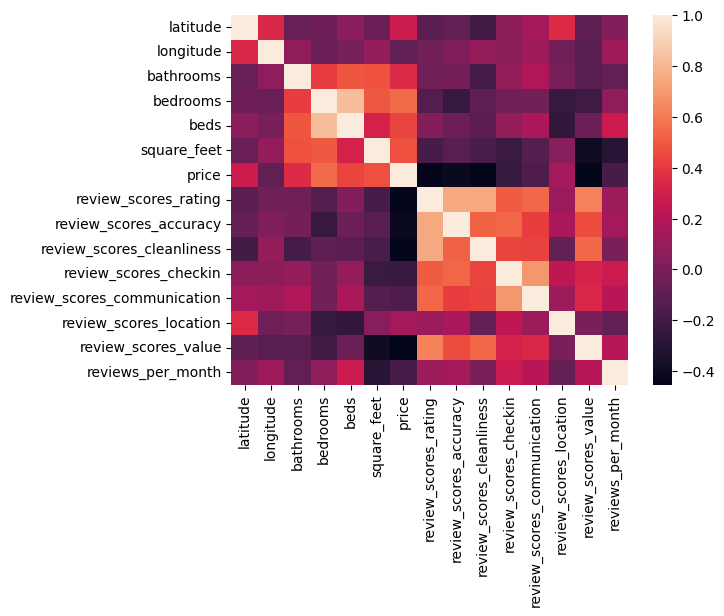

In [217]:
B = BL_num.dropna()
sns.heatmap(B.corr())

Pick numerical variables that has considerable correlation with the reviews. 

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import Normalizer


In [220]:
var = ['reviews_per_month', 'cancellation_policy', 'price']
yvar = ['review_scores_rating']
var_total = var + yvar
BL_model = BL[var_total]


In [229]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [230]:
df_dummy = create_dummy_df(BL_model, ['cancellation_policy'], False)

In [231]:
df_dummy.head()

,reviews_per_month,price,review_scores_rating,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
1,1.30,65.0,94.0,False,True,False,False
2,0.47,65.0,98.0,False,True,False,False
3,1.00,75.0,100.0,False,True,False,False
4,2.25,79.0,99.0,True,False,False,False
5,1.70,75.0,100.0,True,False,False,False


In [232]:
df_dummy.isnull().sum()/df_dummy.shape[0]

reviews_per_month                      0.0
price                                  0.0
review_scores_rating                   0.0
cancellation_policy_flexible           0.0
cancellation_policy_moderate           0.0
cancellation_policy_strict             0.0
cancellation_policy_super_strict_30    0.0
dtype: float64

In [251]:
y = df_dummy['review_scores_rating']
X = df_dummy.drop(columns = ['review_scores_rating'])
#transformer = Normalizer().fit(X)
#X_std = transformer.transform(X)
#data_fit = pd.DataFrame(data = X_std, columns = X.columns)
#data_fit

,reviews_per_month,price,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,0.019994,0.999682,0.000000,0.015380,0.000000,0.0
1,0.007230,0.999856,0.000000,0.015382,0.000000,0.0
2,0.013331,0.999822,0.000000,0.013331,0.000000,0.0
3,0.028467,0.999515,0.012652,0.000000,0.000000,0.0
4,0.022659,0.999654,0.013329,0.000000,0.000000,0.0
...,...,...,...,...,...,...
2767,0.014703,0.999784,0.000000,0.014703,0.000000,0.0
2768,0.004782,0.999884,0.000000,0.000000,0.014491,0.0
2769,0.023521,0.999654,0.000000,0.000000,0.011761,0.0
2770,0.004927,0.999883,0.000000,0.000000,0.014491,0.0


In [258]:
Fit Linear Regression Model

SyntaxError: invalid syntax. Perhaps you forgot a comma? (332630042.py, line 1)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lm_model = LinearRegression(fit_intercept = True) # Instantiate
reg= lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

    #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


In [256]:
test_score

0.03165174085529032

In [257]:
reg.coef_

array([ 0.36993847,  0.01167262,  0.72199122,  1.23105889,  0.12485646,
       -2.07790658])